Task: INNOMATICS RESEARCH **LAB** 

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [ ]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [ ]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Checking imbalance problem

In [ ]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


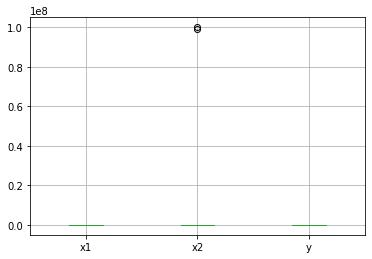

In [ ]:
boxplot=df.boxplot(column=['x1','x2','y'])

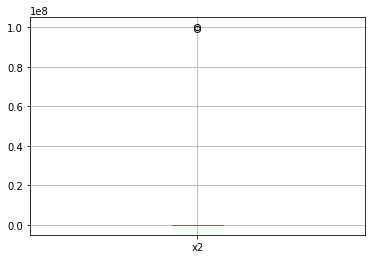

In [ ]:
df.boxplot(column=['x2'])

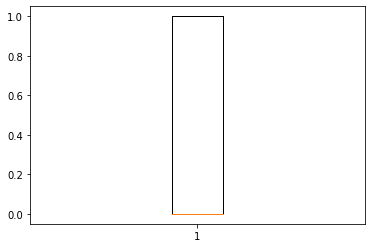

In [ ]:
plt.boxplot(df["y"])
plt.show()

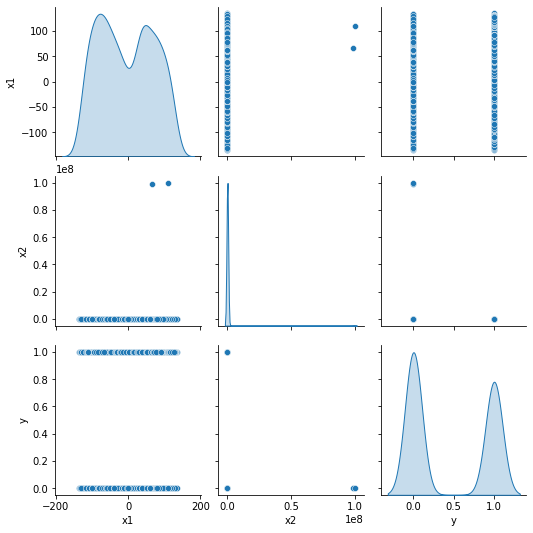

In [ ]:
sns.pairplot(df,diag_kind="kde")

# Model LIBRARIES

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
np.random.seed(42)

In [ ]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


# Filling missing Values

In [ ]:
median = df["x1"].median()
df["x1"].fillna(median, inplace=True)

In [ ]:
median2 = df["x2"].median()
df["x2"].fillna(median2, inplace=True)

In [ ]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

SPLITTING

In [ ]:
y=df['y']

In [ ]:
y.shape

(2227,)

In [ ]:
X=df.drop('y',axis=1)

In [ ]:
X.shape

(2227, 2)

# Logistic Regression

In [ ]:
np.random.seed(42)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


lr=LogisticRegression(solver="liblinear")

lr.fit(X_train,y_train)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001,
                   verbose=True, warm_start=False)

In [ ]:
lr.score(X_test,y_test)

0.5672645739910314

In [ ]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# DEcisoin Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
np.random.seed(42)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

p = DecisionTreeClassifer()

p.fit(X_train,y_train)


NameError: ignored

SVC without hyperparameter

In [ ]:
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=SVC(kernel="linear")

clf.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.score(X_test,y_test)

SVC with hyperparamter

In [ ]:
from sklearn.svm import SVC

In [ ]:
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=SVC(kernel="linear",C=10,degree=3,gamma='scale')

clf.fit(X_train,y_train)



SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.score(X_test,y_test)

0.5403587443946188

SVM parameter grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [

    {'C':[0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 10, 100], 'degree': [0, 1, 2, 3, 4, 5, 6]}
  ]

random = SVC(random_state=42)
grid_search = GridSearchCV(random, param_grid, cv=5,
                            return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'degree': [0, 1, 2, 3, 4, 5, 6],
                          'gamma': [0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
grid_search.score(X_test,y_test)

0.9237668161434978

In [ ]:
grid_search.best_params_

{'C': 1, 'degree': 0, 'gamma': 0.1}

KNN without HYPerparameter

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

# Train the model using the training sets
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model.score(X_test,y_test)

0.9618834080717489

KNN with hyperparameter

In [ ]:
model.score(X_test,y_test)

0.9618834080717489

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(metric ='manhattan', n_neighbors= 15, weights= 'uniform')

# Train the model using the training sets
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
model.score(X_test,y_test)

0.9596412556053812

KNN hyperparameter grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [

    {'n_neighbors' : [5,7,9,11,13,15] , 'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
  ]

r = KNeighborsClassifier()
grid_search = GridSearchCV(r, param_grid, cv=5,
                            return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'metric': ['minkowski', 'euclidean', 'manhattan'],
                          'n_neighbors': [5, 7, 9, 11, 13, 15],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
grid_search.score(X_test,y_test)

0.9596412556053812

In [ ]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

Decision Tree

In [109]:
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Make baseline predictions
DT.score(X_test,y_test)


0.9461883408071748

**COMAPRING MODELS**

In [112]:
models={"LogisticRegression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Decision Tree":DecisionTreeClassifier(),
        "SupportVectorMachine":SVC()
        }

# Create a function to detrmine the scores and fit the models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different Scikit learning machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    for name,model in models.items():
        #Fit the model into the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    # Return the model scores
    return model_scores

In [113]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores   

{'Decision Tree': 0.9484304932735426,
 'KNN': 0.9618834080717489,
 'LogisticRegression': 0.5493273542600897,
 'SupportVectorMachine': 0.5403587443946188}

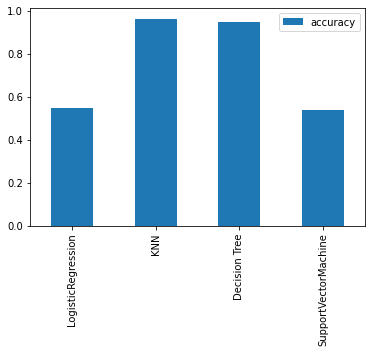

In [114]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

OBSERVATION

In [ ]:
Result: By viewing the Results of comparing model  KNN and decision Tree are more powerful than other  and among them KNN is powerdul
         because it has the power to handle the scaling datasets